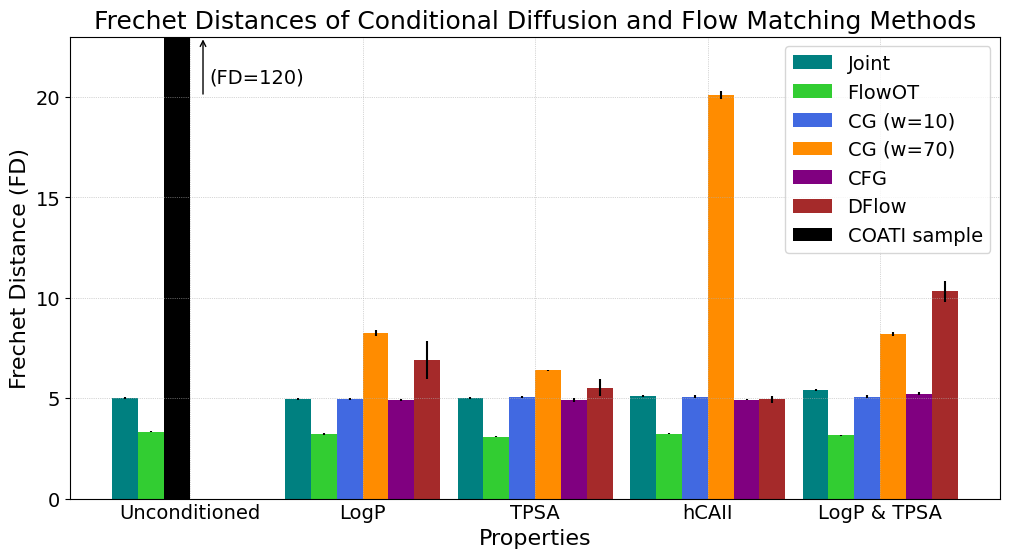

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from coatiLDM.common.s3 import load_figure_file
import os

# Function to parse the mean and standard deviation from the table values
def parse_mean_std(value):
    if pd.isna(value) or value == '-':
        return np.nan, np.nan
    if '±' in value:
        mean, std = value.split(' ± ')
        return float(mean), float(std)
    return float(value), 0  # Assuming 0 standard deviation if only a single value is provided

# Load the data from the reordered CSV with COATI sample

df_coati_reordered = load_figure_file('fd_table.csv',local_dir='./figure_data',filetype='csv')[:6]
df_coati_reordered = df_coati_reordered.rename(columns={'Uncond.': 'Unconditioned'})

# Parsing the data
parsed_data_coati_reordered = {col: [parse_mean_std(val) for val in df_coati_reordered[col].astype(str)] for col in df_coati_reordered.columns[1:]}

# Adjusting the list of methods to include "COATI sample"
methods_coati_reordered = df_coati_reordered['Method'].tolist()

# Number of properties and width of a bar
num_properties = len(parsed_data_coati_reordered)
bar_width = 0.15

# X locations for the groups
indices = np.arange(num_properties)

# Colors for the bars
colors = ['teal', 'limegreen', 'royalblue', 'darkorange', 'purple', 'brown', 'black']  # Added 'black' for COATI sample

# Preparing the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each method
for i, method in enumerate(methods_coati_reordered):
    means = [parsed_data_coati_reordered[prop][i][0] for prop in parsed_data_coati_reordered]
    stds = [parsed_data_coati_reordered[prop][i][1] for prop in parsed_data_coati_reordered]
    ax.bar(indices + i * bar_width, means, bar_width, yerr=stds, color=colors[i % len(colors)], label=method)

# High FD value for COATI sample
coati_fd = 120
# Precisely adjusted position for COATI sample
coati_position_exact = indices[0] + (df_coati_reordered[df_coati_reordered['Method'] == 'FlowOT'].index[0] + 1) * bar_width

# Plotting COATI sample at the precisely adjusted position
ax.bar(coati_position_exact, coati_fd, bar_width, yerr=0, color='black', label='COATI sample')

# Adding a red arrow pointing upwards, positioned at the y-value where the FD is 20
arrow_x = coati_position_exact + bar_width  # Position to the right of the COATI sample bar
arrow_y = 20  # The specified Frechet Distance value
ax.annotate("", xy=(arrow_x, arrow_y + 3), xytext=(arrow_x, arrow_y),
            arrowprops=dict(facecolor='red', arrowstyle="->", lw=1))

# Adding the text "(FD=120)" at FD=21
text_x = arrow_x + bar_width / 4
text_y = 21  # Adjusted position for the text
ax.text(text_x, text_y, '(FD=120)', color='black', va='center', fontsize=14)

# Setting y-axis max value to 23
ax.set_ylim(0, 23)

# Removing x-axis ticks
ax.tick_params(axis='x', which='both', length=0)
# sizing
ax.tick_params(axis='both', labelsize=14)
# grid
ax.grid(True, linestyle=':', linewidth=0.5) 
# Adding labels and title
ax.set_xlabel('Properties',fontsize=16)
ax.set_ylabel('Frechet Distance (FD)',fontsize=16)
ax.set_title('Frechet Distances of Conditional Diffusion and Flow Matching Methods',fontsize=18)
ax.set_xticks(indices + bar_width * 2.5)
ax.set_xticklabels(parsed_data_coati_reordered.keys())
ax.legend(fontsize=14)

#plt.savefig('FD_bar_plot.svg')
# Showing the plot
plt.show()

